# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

In [3]:
# NOTE TO INSTRUCTORS: On piazza, it said we could use pandas. I'm additionally importing seaborn just for the 
    # visualization formatting options. 
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

### Needle Length Up to 1 Unit

Recall from lecture that $\theta$ is the acute angle of the needle to the closest line and that x is the distance of the needle center to the closest line. 

To start this problem, I start off by sampling uniformly from the support of x (0 to t/2 where t=1) and $\theta$ (0 to $\pi$/2). I then calculate the proportion of samples that intersect a floorline, which is true when half the needle length L is greater than or equal to $x/sin(\theta)$. 

I then write a separate function (get_buffon_simulations) to handle creating multiple simulations for each needle length in the target range. 

From experimenting, I find that the estimated probability and the standard deviation are satisfactory when I do 1000 samples per simulation and 1000 simulations per needle length. 

When I plot out the results on a line chart as a function of needle length, juxtaposed with the analytic solutions, they look pretty close. The error bars are rather small, so I double them on each side of the mean to make them more visible. 

In [4]:
def simulate_buffon_needles(L, N_total, t):
    #drawing random points uniform between the support 
    x = np.random.uniform(low=0, high=t/2., size=N_total)  
    theta = np.random.uniform(low=0, high=np.pi/2., size=N_total)
    
    # check if needle crosses the line
    intersects = (L/2 >= x/np.sin(theta))
    
    # sum up the intersecting needles
    N_intersect = np.sum(intersects)
    
    probability = N_intersect/float(N_total)
    return probability

In [5]:
def get_buffon_simulations(simulation_count, needle_len_range):
    simulations = {}
    
    for length in needle_len_range:
        length = round(length, 1)
        
        # stringify the length to use as a key in the dict
        name = str(length)
        
        # create simulation array for each needle length
        simulations[name] = np.zeros(simulation_count)
        
        for i in range(simulation_count):
            simulations[name][i] = simulate_buffon_needles(length, N_total, t)

    sim_df = pd.DataFrame(simulations)
    
    return sim_df

In [6]:
N_total = 1000 #number of samples
t = 1.0
simulation_count = 1000
needle_len_range = np.linspace(0.1, 1, 10)

In [7]:
sim_df = get_buffon_simulations(simulation_count, needle_len_range)

Please note here that I have put 2 standard deviations on each side of the mean for each given needle length in order to be more visible, given how small the standard deviations are. 

[]

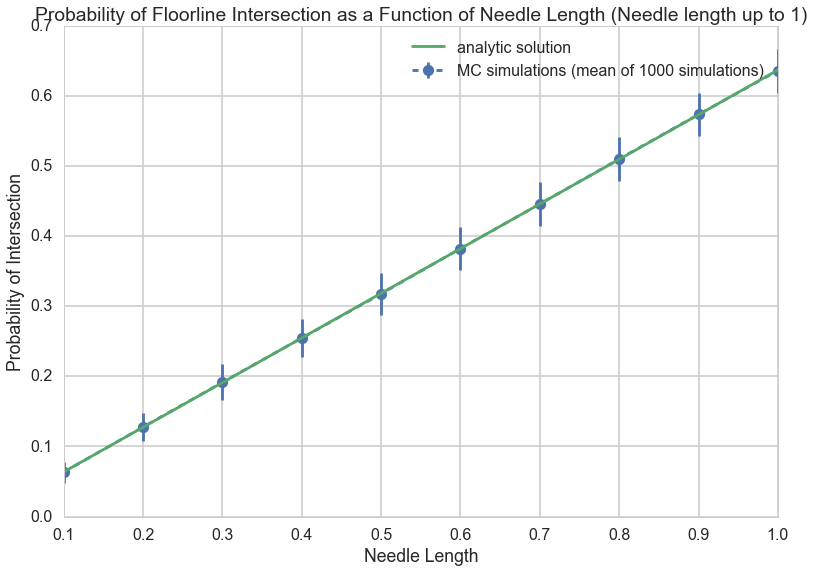

In [8]:
# NOTE I have put 2 Standard deviations on each side of the mean in order for the error bars to be more visible

plt.errorbar(needle_len_range, sim_df.mean(), yerr=[2*sim_df.std(), 2*sim_df.std()], 
             fmt='--o', label='MC simulations (mean of %r simulations)' % simulation_count)

# analytic comparison
plt.plot(needle_len_range, 2*needle_len_range/np.pi, label='analytic solution')

plt.title('Probability of Floorline Intersection as a Function of Needle Length (Needle length up to 1)')
plt.ylabel('Probability of Intersection')
plt.xlabel('Needle Length')
plt.legend()
plt.plot()

Although this was not asked, I also plotted histograms to see how the distributions varied by needle length. 

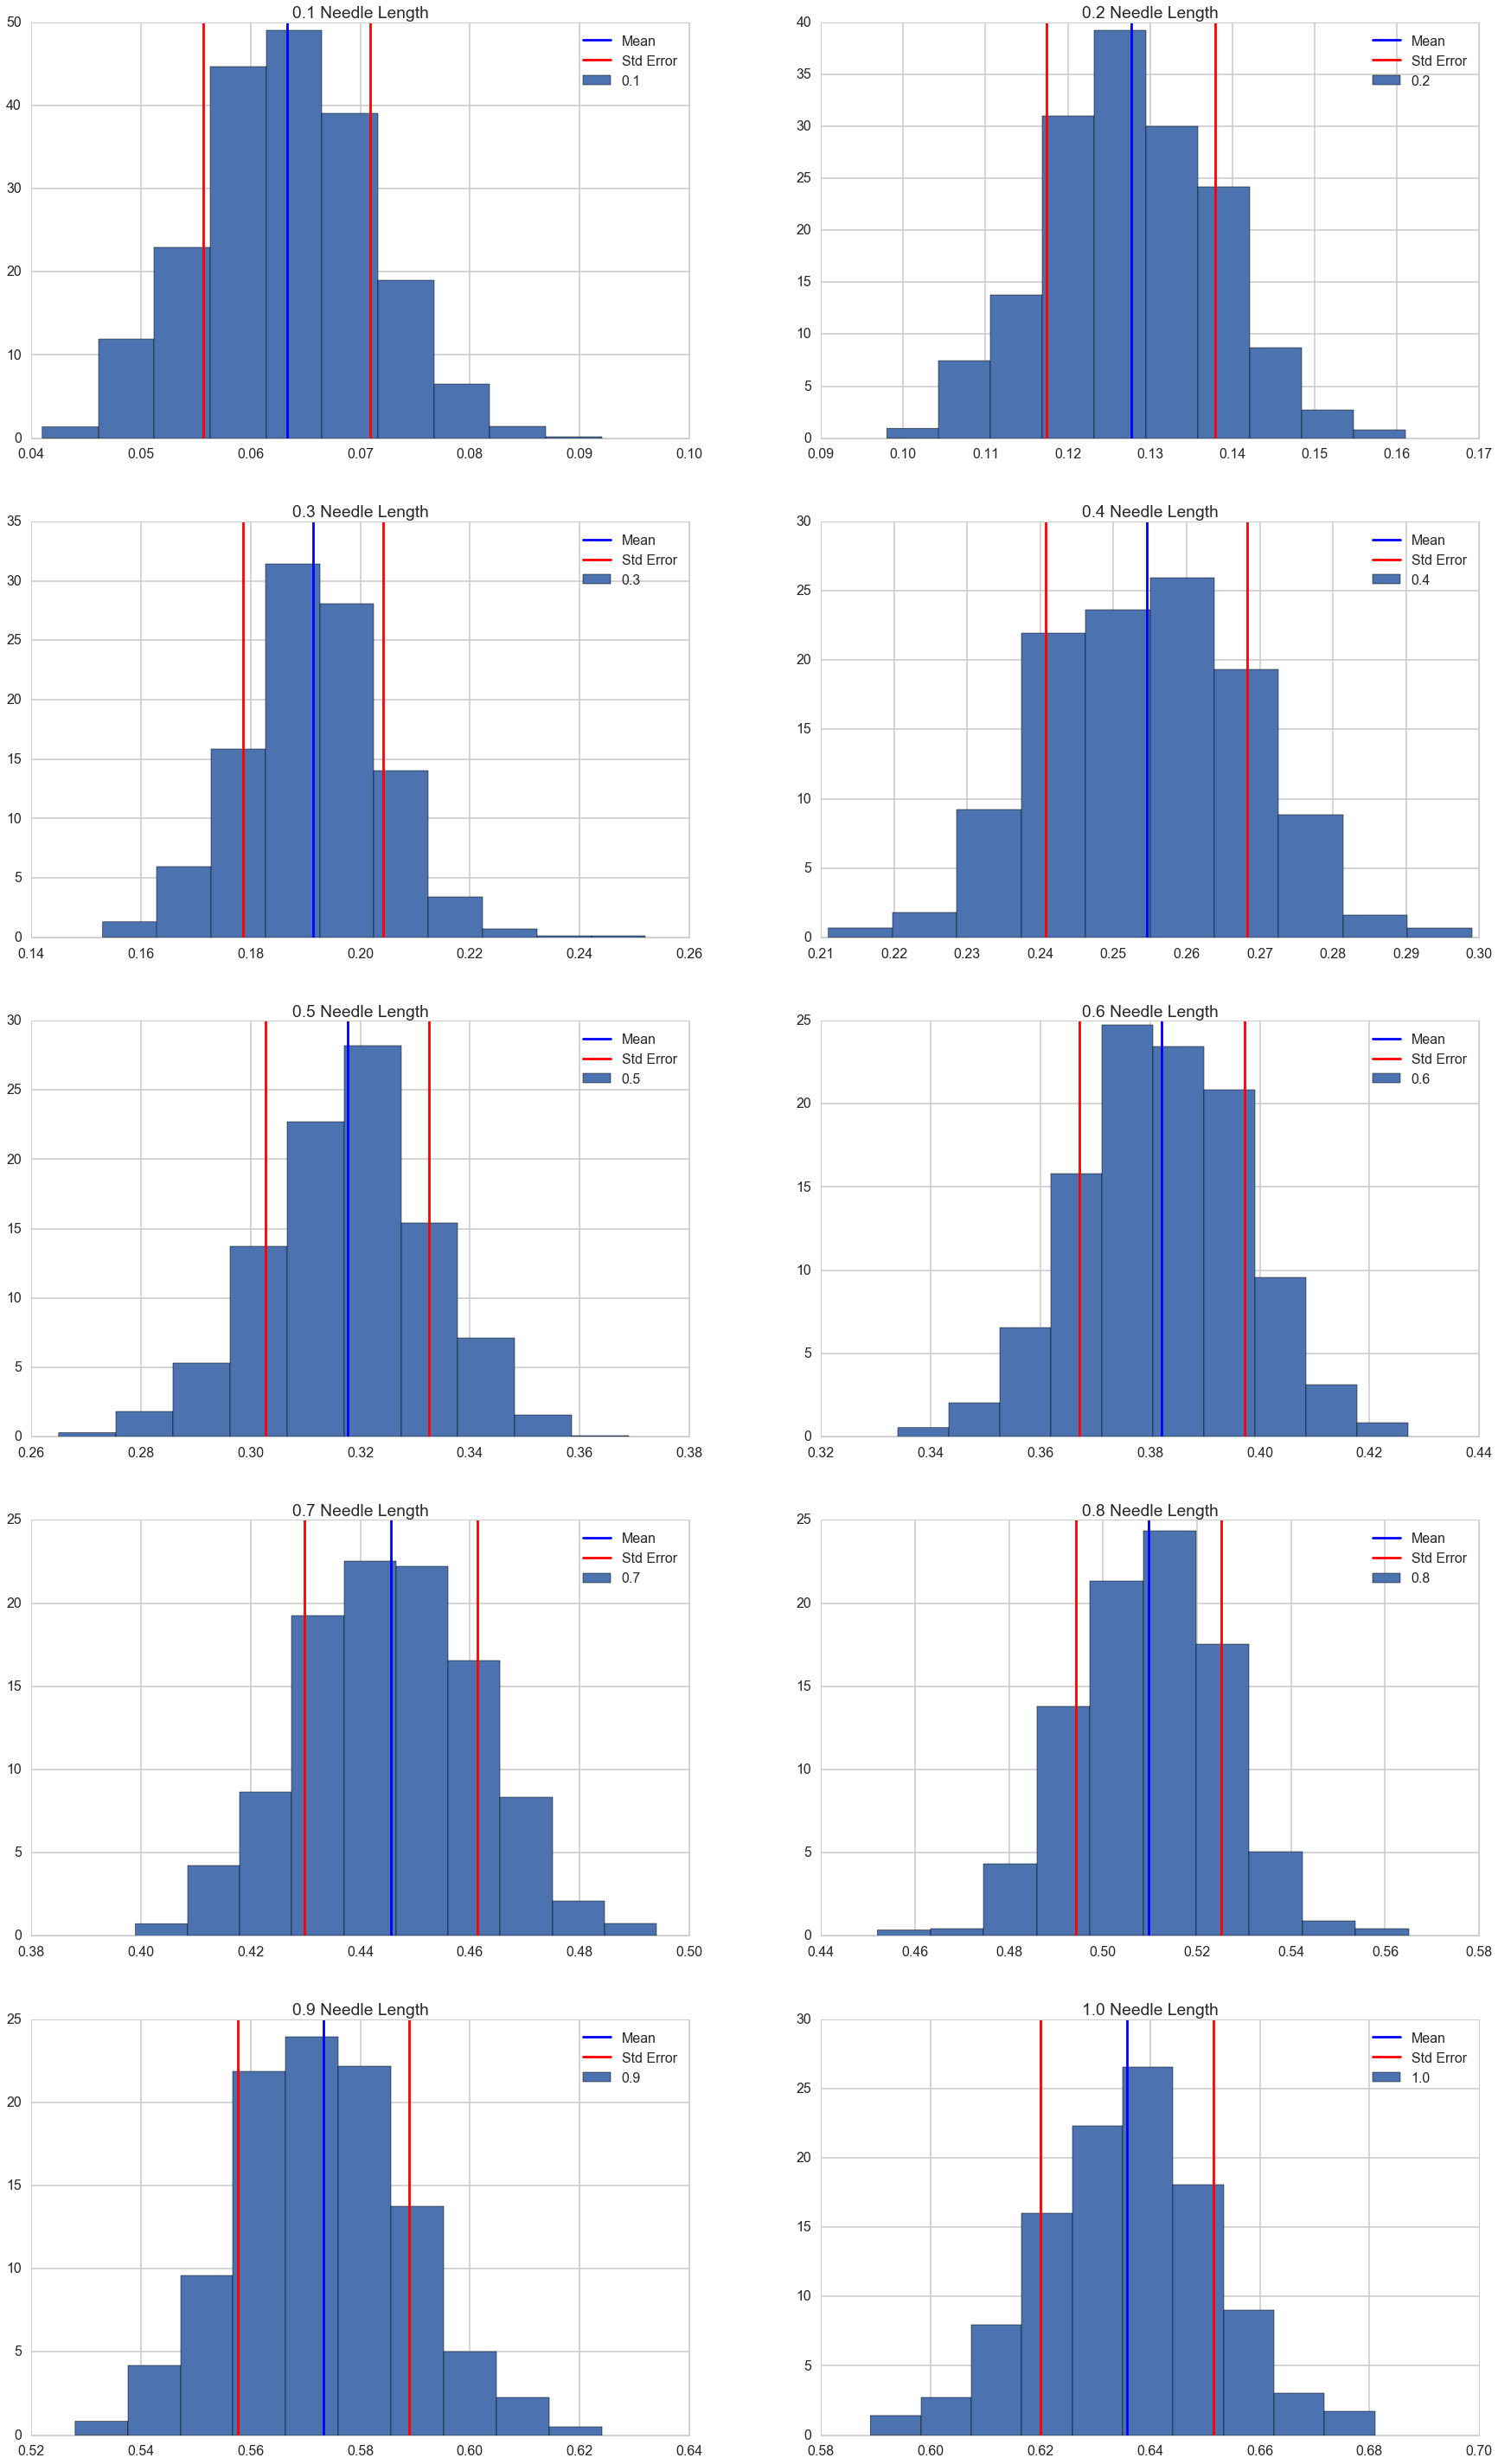

In [9]:
#plot histograms for each needle length

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))    

for ax, ind in zip(axes.ravel(), sim_df.columns):
    ax.hist(sim_df[ind], normed=True)
    ax.axvline(sim_df[ind].mean(), color='blue', label='Mean')
    ax.axvline(sim_df[ind].mean()-sim_df[ind].std(), color='red', label='Std Error')
    ax.axvline(sim_df[ind].mean()+sim_df[ind].std(), color='red')
    ax.set_title('%s Needle Length' % ind)
    ax.legend()

### Needle Length up to 2 units



I apply the same procedure as above, but this time modifying the needle length range to be from 0.1 to 2 (inclusive) in 0.1 increments. I again use 1000 simulations per needle length and 1000 samples per simulation.

You can see from the line chart below that the Monte Carlo simulation results diverge from the analytical results starting from needle length of 1. This is because the analytical solution made the assumption that the length of the needle was less than t (the distance between the floorlines): L < t.

In order to correct the analytical formula, you would need to correct the integral by changing the upper boundary of the integral on x to be min(t/2, 1/2*sin($\theta$). With the short needle, the probability that the needle crosses two lines at the same time is zero, so we did not need to account for that case. In the case where the needle is long, the probability of crossing will be 1 after being above a certain angle and as the length approaches infinity, the probability tends towards 1. 

$$\int_0^{\pi/2} \int_0^{min(t/2, L/2sin(\theta))} \frac{4}{t\pi}dx d\theta$$

In [10]:
simulation_count2 = 1000

# this time the needle length range will go to 2 units
needle_len_range2 = np.linspace(0.1, 2, 20)

# get the simulations and store into variable sim_df2
sim_df2 = get_buffon_simulations(simulation_count2, needle_len_range2)

[]

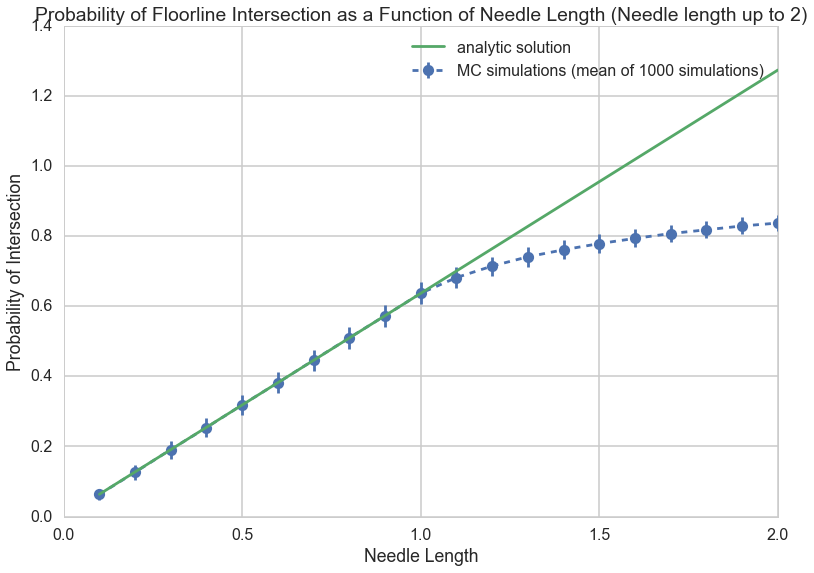

In [11]:
# NOTE I have put 2 Standard deviations on each side of the mean in order for the error bars to be more visible

plt.errorbar(needle_len_range2, sim_df2.mean(), yerr=[2*sim_df2.std(), 2*sim_df2.std()], 
             fmt='--o', label='MC simulations (mean of %r simulations)' % simulation_count)

# analytic comparison - makes assumption that L < t
plt.plot(needle_len_range2, 2*needle_len_range2/np.pi, label='analytic solution')
plt.title('Probability of Floorline Intersection as a Function of Needle Length (Needle length up to 2)')
plt.ylabel('Probability of Intersection')
plt.xlabel('Needle Length')
plt.legend()
plt.plot()

Again, although not required, I was curious to plot the distributions of each needle length below: 

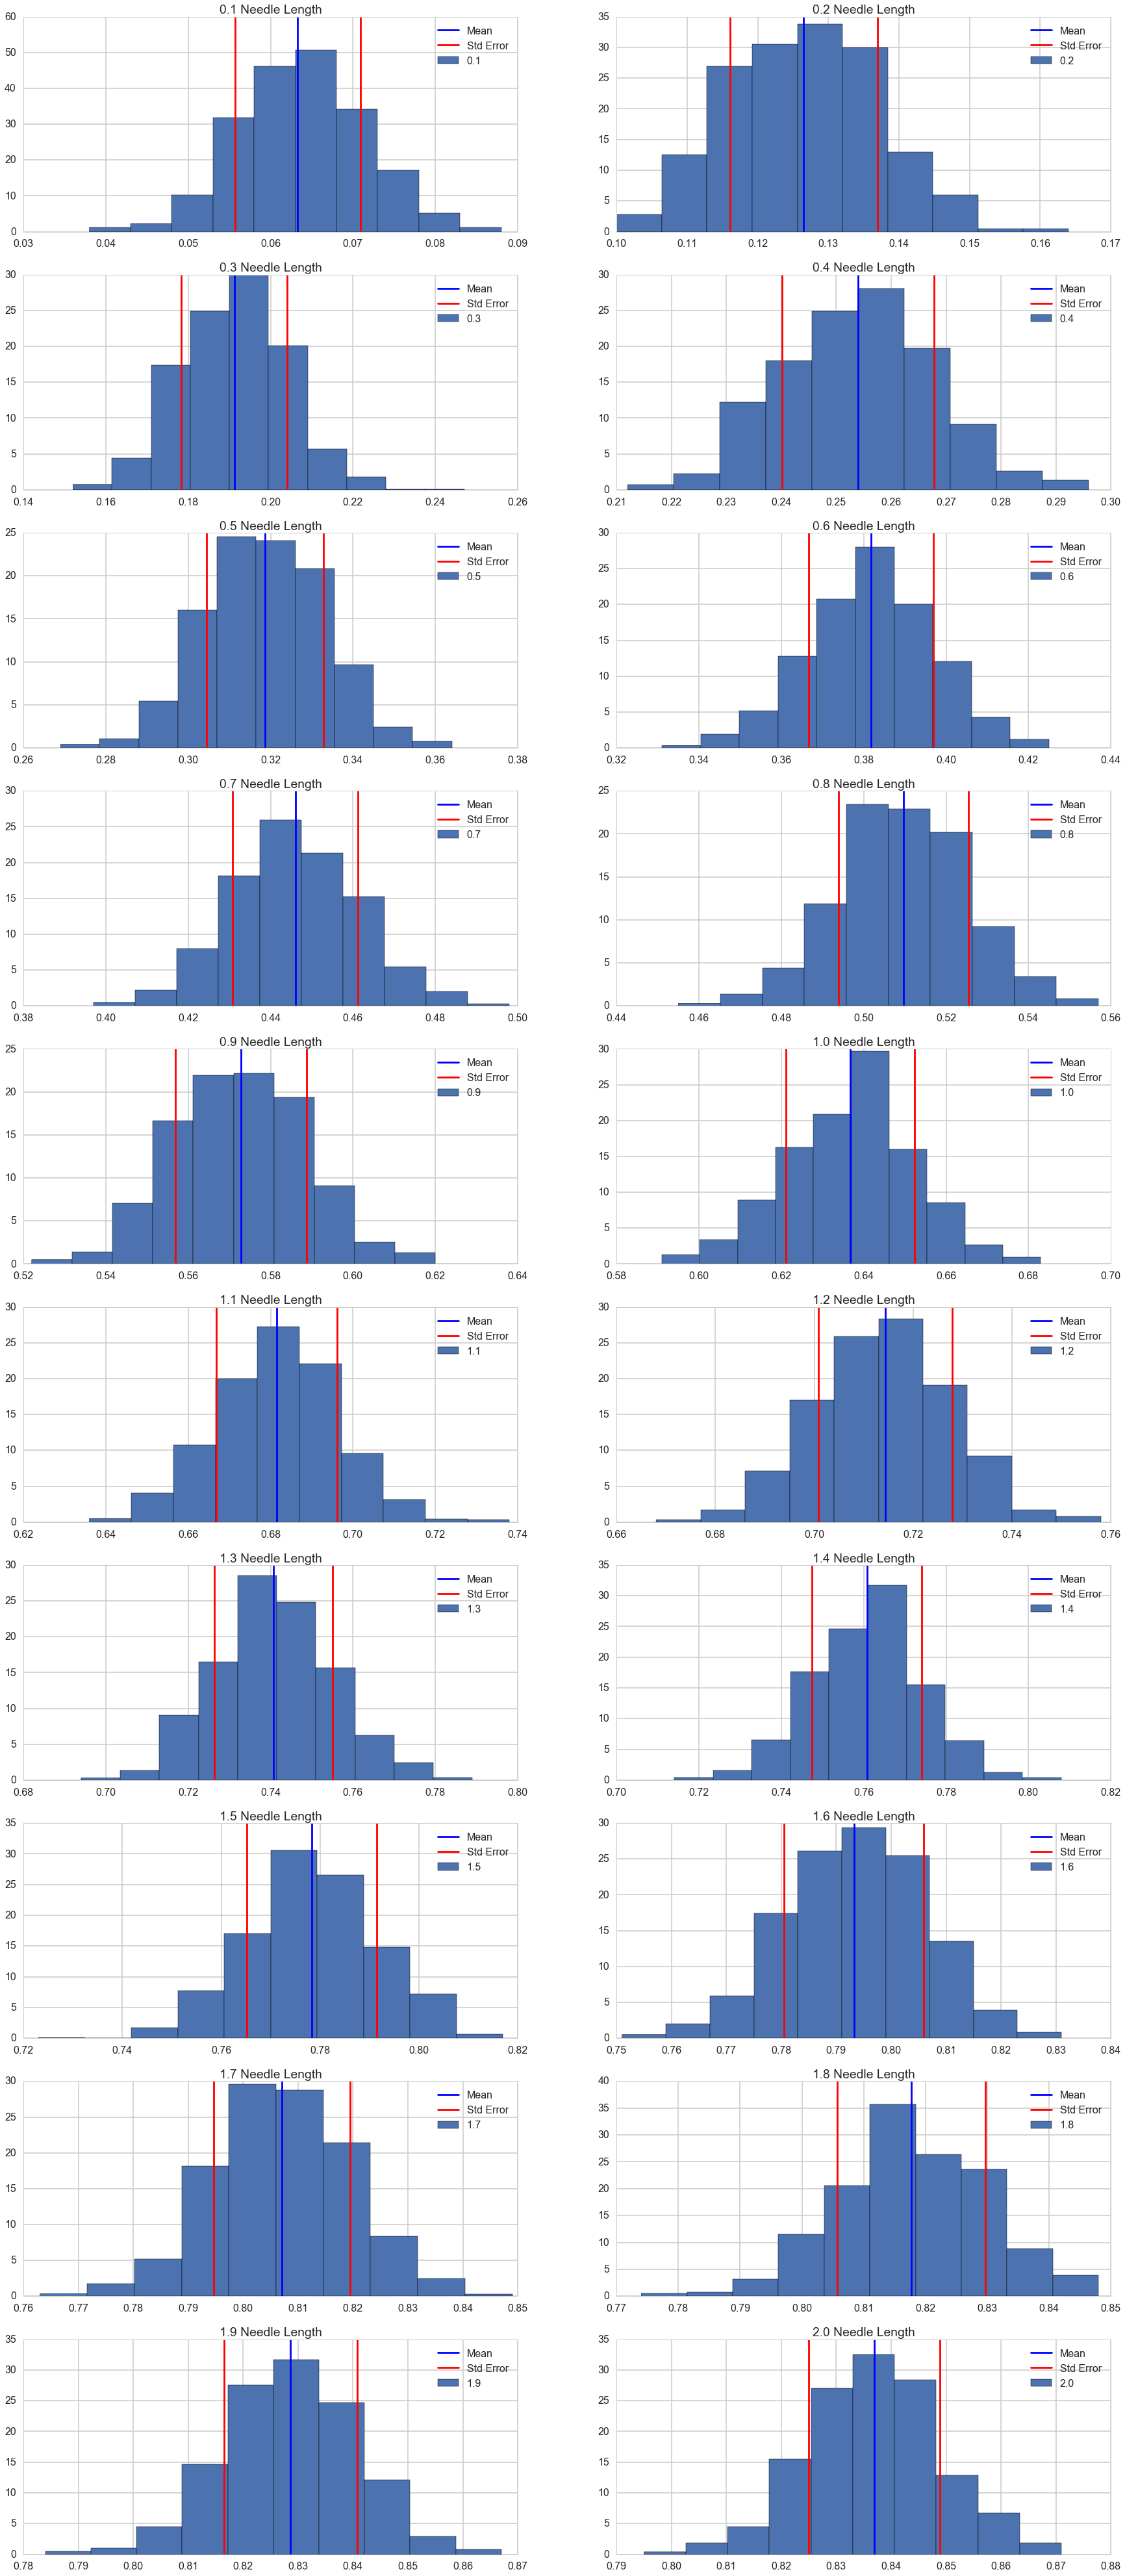

In [12]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(30, 70))    

for ax, ind in zip(axes.ravel(), sim_df2.columns):
    ax.hist(sim_df2[ind], normed=True)
    ax.axvline(sim_df2[ind].mean(), color='blue', label='Mean')
    ax.axvline(sim_df2[ind].mean()-sim_df2[ind].std(), color='red', label='Std Error')
    ax.axvline(sim_df2[ind].mean()+sim_df2[ind].std(), color='red')
    ax.set_title('%s Needle Length' % ind)
    ax.legend()

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.

**Please answer this problem by adding cells here.**


Using the Mean Value Theory for integrals, I use Monte Carlo simulation to estimate the expected value of the function within the bounds of the integral by drawing samples uniformly within the boundaries of the integral and then evaluating each x sample with the function to integrate. Finally, I average the values of all the samples together to get the expected value and multiply this by the integral bounds range to estimate the vaue of the actual integral. 

In [13]:
def estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries):
    simulations = np.zeros(number_of_tries)
    number_of_samples = float(number_of_samples)
    
    for i in range(number_of_tries):
        # choose out of uniform[lower_bound, upper_bound]
        x = np.random.uniform(low=lower_bound, high=upper_bound, size=number_of_samples)  

        # apply function
        y = function_to_integrate(x)

        # get average to get expected value of function 
        average = y.sum()/number_of_samples
        # do # for # of samples, sum and divide by number of samples

        # multiply result of above to (upper_bound-lower_bound)
        simulations[i] = average*(upper_bound - lower_bound)

    # return the mean of simulatoins and standard deviation
    return simulations, simulations.mean(), simulations.std()

To get to a close enough estimate and standard deviation I was comfortable with, I used 10,000 samples per simulation over 10,000 simulations. The mean estimate for the first integral listed was about 3.9 with a standard deviation of 0.0037. 

In [14]:
function_1 = lambda x: x**(x/4)

In [15]:
simulations1, mean1, stddev1 = estimate_integral_MC(function_1, 0, 3, 100000, 10000)

/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
print 'The mean estimate of the first integral is', mean1
print 'The standard deviation of the estimate of the first integral is', stddev1

The mean estimate of the first integral is 3.91570394145
The standard deviation of the estimate of the first integral is 0.00373254493357


[]

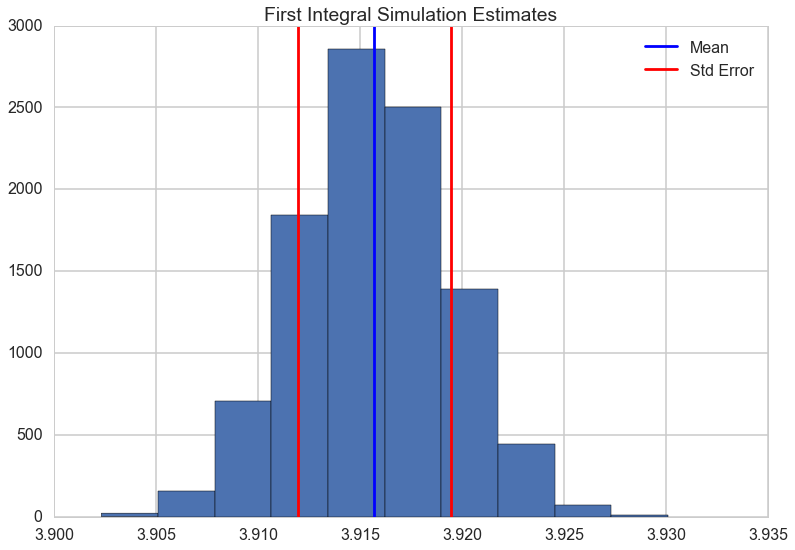

In [17]:
plt.hist(simulations1)
plt.axvline(mean1, color='blue', label='Mean')
plt.axvline(mean1-stddev1, color='red', label='Std Error')
plt.axvline(mean1+stddev1, color='red')
plt.title('First Integral Simulation Estimates')
plt.legend()
plt.plot()

For the second integral, I also used 10,000 samples per simulation over 10,000 simulations. The mean estimate for the second integral listed was about 0.355 with a standard deviation of 0.001. 

In [18]:
function_2 = lambda x: np.log(x)*np.log(1-x)

In [19]:
simulations2, mean2, stddev2 = estimate_integral_MC(function_2, 0, 1, 10000, 10000)

/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [20]:
print 'The mean estimate of the second integral is', mean2
print 'The standard deviation of the estimate of the second integral is', stddev2

The mean estimate of the second integral is 0.35504200767
The standard deviation of the estimate of the second integral is 0.00125496303529


[]

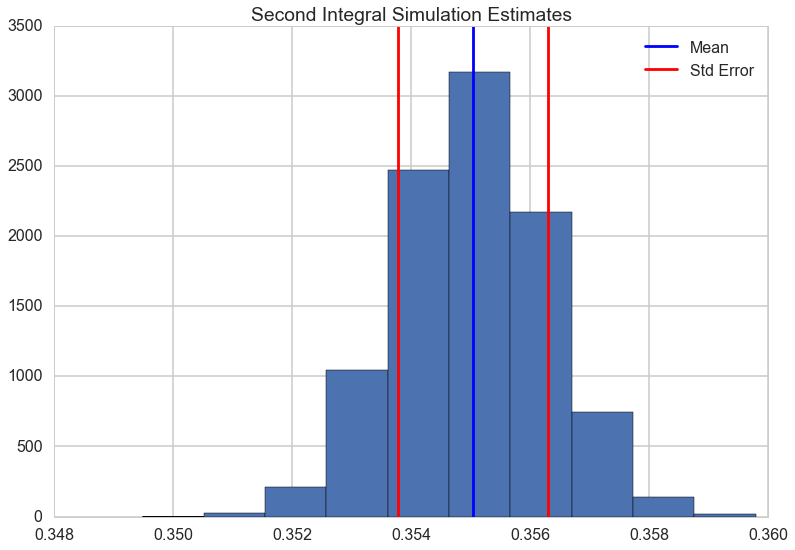

In [21]:
plt.hist(simulations2)
plt.axvline(mean2, color='blue', label='Mean')
plt.axvline(mean2-stddev2, color='red', label='Std Error')
plt.axvline(mean2+stddev2, color='red')
plt.title('Second Integral Simulation Estimates')
plt.legend()
plt.plot()

# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

For this problem, I envisioned an imaginary box enclosing the entire whole donut. I sampled uniformly from this box and calculated the proportion of randomly sampled points that evaluated as being within the torus (the whole donut) using the given formula condition. Using this proportion as a baseline, I then repeated the same process with the cut donut imposing two additional conditions of y >= -3 and x <= 1 for the places where the roommmate cut the donut (minor detail but I assumed the actual cut locations were left for you to eat, hence the non-strict inequalities). I then have the proportion of volume the cut donut takes up out of the same enclosing box. By dividing the cut donut's proportion by the baseline proportion, I could esimate the percentage of the donut that my roommate left for me. In this way, I did not need to make use of the weights, but instead compared the estimated proportions that the donut takes up of of the same imaginary "donut box" surrounding the donut. 

In order to check my formula was working correctly to a level of precision I was comfortable with, I tested with a half and quarter donut left, which is easy to visualize if you have a cut at y = 0 and/or x = 0. I felt that 1000 samples and 1000 simulations was sufficient to give me an answer I was comfortable with. 

Finally, I estimated that my roommate left about 54% of the donut for me to eat with a standard error of about 0.02.

In [22]:
def is_in_donut(x, y, z, a=1., c=3.):
    result = z**2 + (np.sqrt(x**2+y**2)-c)**2 
    return result <= a**2

In [23]:
# test out function with half donut left
half = lambda x, y, z: y <= 0

In [24]:
# test out function with quarter donut left
quarter = lambda x, y, z: y <= 0 and x <= 0

In [25]:
# assume cut point is left for you to eat
roommate = lambda x, y, z: y >= -3 and x <= 1

In [26]:
# another function imposing additional conditions for the cut locations
def is_in_cut_donut(x, y, z, func):
    return is_in_donut(x, y, z) and func(x, y, z)

is_in_donut_cut_vect = np.vectorize(is_in_cut_donut)

In [27]:
def get_donut_left(n_samples, n_sims, func): 
    results = np.zeros(n_sims)
    for i in range(n_sims):
        # randomly sample from 3D box that is approximatley 4 x 4 x 2 units centered at (0, 0, 0)
        # make the upper bound inclusive (it's exclusive now) [low, high) - want the surface of the donut too
        x = np.random.uniform(-4, 4.1, n_samples)
        y = np.random.uniform(-4, 4.1, n_samples)
        z = np.random.uniform(-1, 1.1, n_samples)

        # check the proportion that the whole donut takes up of the volume of the whole box
        whole_donut_prob = sum(is_in_donut(x, y, z))/float(n_samples)
        
        # check the proportion that the partial donut takes up of the volume of the whole box
        partial_donut_prob = sum(is_in_donut_cut_vect(x, y, z, func))/float(n_samples)

        # divide the two proportions to get back what % of the whole donut is left
        results[i] = partial_donut_prob/whole_donut_prob
        
    return results

In [28]:
n_samples = 1000
n_sims = 1000

In [29]:
# test results to check I get close to half
results_test_half = get_donut_left(n_sims, n_samples, half)
print 'The mean is',  results_test_half.mean()
print 'The standard deviation is', results_test_half.std()

The mean is 0.500482762866
The standard deviation is 0.0239871008213


In [30]:
# test results to check I get close to quarter
results_test_quarter = get_donut_left(n_sims, n_samples, quarter)
print 'The mean is', results_test_quarter.mean()
print 'The standard deviation is', results_test_quarter.std()

The mean is 0.249856397258
The standard deviation is 0.0212782331379


In [31]:
# the results of how much my roommate left for me
results_roommate = get_donut_left(n_sims, n_samples, roommate)
print 'The mean is', results_roommate.mean()
print 'The standard deviation is', results_roommate.std()

The mean is 0.538915212541
The standard deviation is 0.0227963089388


# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

First, I plot the distribution (without the normalization factor) using discrete values 1 through 12 for each month. The distribution shows a peak in February and gradually declining each subsequent month, which makes intuitive sense. 

I then calculate the normalization constant for this by dividing one over the sum of the entire pmf, so that when the normalization constant is multiplied by the sum of the pmf, it equals to 1. The normalizatoin constnat I calculate is 0.392. 

Note that in general in problem 4, since we are being asked to generate a sampling distribution and not estimates, I did not create any error bars. 

In [32]:
pmf = lambda t: (t - 0.9)/((t-1)**2 + 1)
t = np.arange(1, 13)

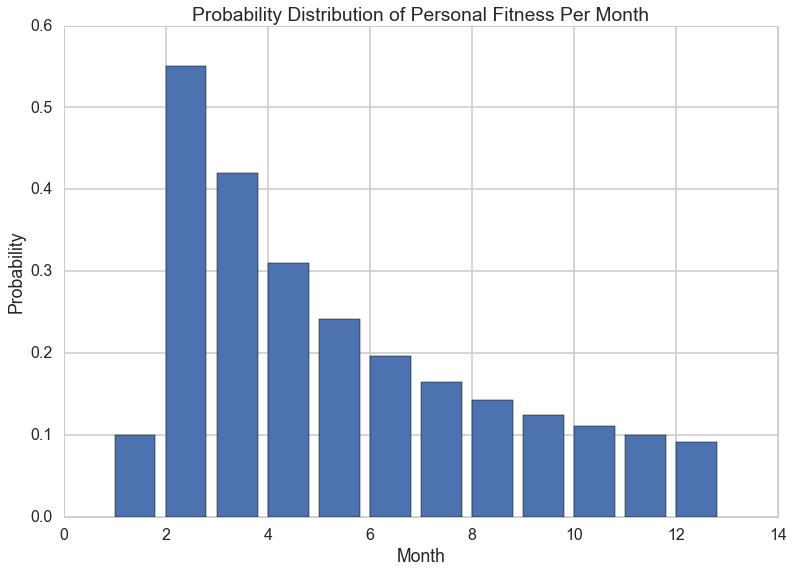

In [33]:
# Interpretation: In Feb, if asking N people, 0.55 proportion will say they are "fit"
pmf_each = pmf(t)
plt.bar(t, pmf_each)
plt.xlabel('Month')
plt.ylabel('Probability')
plt.title('Probability Distribution of Personal Fitness Per Month')

In [34]:
# compute the normalization factor by calculating the constant necessary to make the CDF add up to 1. 
norm_constant = 1/sum(pmf_each)
print 'normalization constant is', norm_constant

normalization constant is 0.39203851592


### Rejection Sampling

For rejection sampling, I use numpy's random_integers functions to uniformly general integers from 1 to 12 (inclusive). I then randomly uniformly select y from 0 to 1 and accept x if y is less than x evaluated at the pmf. I repeat this process until 100,000 points have been accepted. When plotting the simulation results (in blue bars), I see a distribution very similar to the true distribution (in the red line). 

Time to run: 0.78635 seconds
Total samples drawn:  471587
Number of accepted samples:  100000


[]

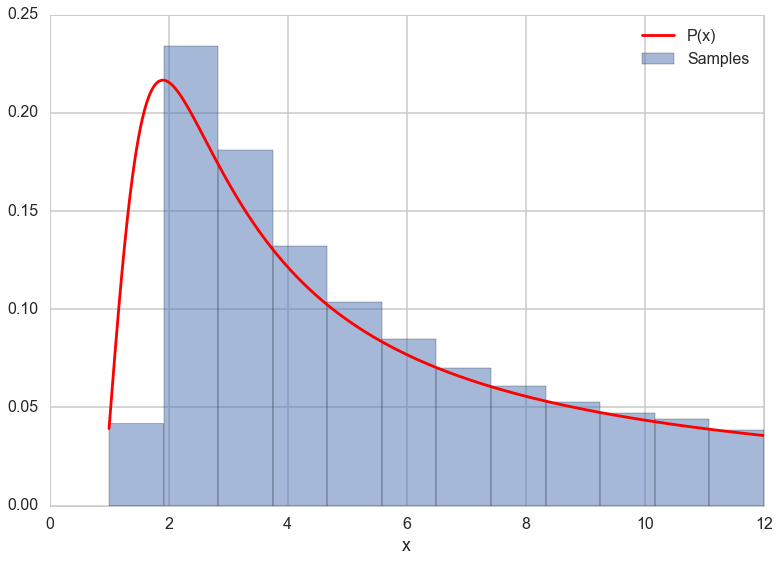

In [35]:
start = time.time()

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 12 # the upper limit of our domain

ymax = 1

N = 100000 # the total of samples we wish to generate
accepted = 0 
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    x = np.random.random_integers(low=xmin, high=xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # trying to get the % of time accepted and rejected for any given x to get the probability for that x in the pdf
        # The resulting samples will have more x's at places where the distribution is higher
    # Do the accept/reject comparison
    if y < pmf(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1

end = time.time() - start
print 'Time to run: %0.5f seconds' % end

print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted

# plot the histogram
# Normed makes it so the area under curve sums to 1, pdf in y axis can vary, depends on x axis segment length
plt.hist(samples,bins=12, label=u'Samples', alpha=0.5, normed=True);

# plot (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, pmf(xvals)*norm_constant, 'r', label=u'P(x)')
plt.xlabel("x")
plt.legend()
plt.plot()

### Inverse Transform



For the inverse transform, I start off by creating a hash table (Python dictionary) of the month (from 1 to 12) as the keys. For the hash map values, I calculate the CDF by keeping a cumulative sum of the PMF and using the normalization constant. In order to be able to do an inverse CDF lookup, I then invert the hash map so that the CDF value is the key and the value is the month (x). 

Since this is a discrete distribution and we plan to use a continuous uniform distribution to apply the inverse transform, we need to apply the following rule: 

Transform U into X as follows: 

$X = x_j$ if $\sum_{i=1}^{j-1} p_i \leq U < \sum_{i=1}^{j} p_i$

Therefore, I also create an array with the CDF values sorted in reverse order in order to find the first CDF value that the uniformly random number U exceeds in value. Once I identify the index i of the array where that holds true, I look up the value of the array at index i-1 from the inverse CDF lookup table. 

From generating the histogram, the inverse transform result looks very similar to the rejection sampling method results above. 

In [36]:
# Build lookup table for CDF, normalized
CDF_lookup = {}
for i in t: 
    CDF_lookup[i] = norm_constant*pmf(i) + CDF_lookup.get(i-1, 0)

CDF_lookup

{1: 0.039203851592042392,
 2: 0.25482503534827561,
 3: 0.41948121203485367,
 4: 0.54101315197018507,
 5: 0.63556361757452262,
 6: 0.71246348031275963,
 7: 0.77709685726180244,
 8: 0.8327663265225026,
 9: 0.88162035696797081,
 10: 0.92512707032011543,
 11: 0.96433092191215786,
 12: 0.99999999999999967}

In [37]:
# reverse the lookup table
invCDF_lookup = {}
for i, u in CDF_lookup.iteritems():
    invCDF_lookup[u] = i
invCDF_lookup

{0.039203851592042392: 1,
 0.25482503534827561: 2,
 0.41948121203485367: 3,
 0.54101315197018507: 4,
 0.63556361757452262: 5,
 0.71246348031275963: 6,
 0.77709685726180244: 7,
 0.8327663265225026: 8,
 0.88162035696797081: 9,
 0.92512707032011543: 10,
 0.96433092191215786: 11,
 0.99999999999999967: 12}

In [38]:
# get cdf values in reverse order array in order to "slot" the uniformly random number into the right "bin"
uniform_sortedbkwd = sorted(invCDF_lookup.keys(), reverse=True)
uniform_sortedbkwd

[0.99999999999999967,
 0.96433092191215786,
 0.92512707032011543,
 0.88162035696797081,
 0.8327663265225026,
 0.77709685726180244,
 0.71246348031275963,
 0.63556361757452262,
 0.54101315197018507,
 0.41948121203485367,
 0.25482503534827561,
 0.039203851592042392]

In [39]:
def lookup(a):
    # just in case
    if a < 0 or a >= 1: 
        raise 

    # handle some rounding errors for the CDF in case the random number generator gets closer to 1
    if a > 0.99999999999999967:
        a = 0.99999999999999967

    # find the first month that a is greater than and return the previous index of the reversed array
    element = None
    for i in range(len(uniform_sortedbkwd)): 
        if a >= uniform_sortedbkwd[i]:
            element = uniform_sortedbkwd[i-1]
            break
    
    # catch the case where it's January
    if element is None: 
        element = uniform_sortedbkwd[-1]
    
    return invCDF_lookup[element]
   

lookup_vec = np.vectorize(lookup)

Time to run: 0.18641 seconds


[]

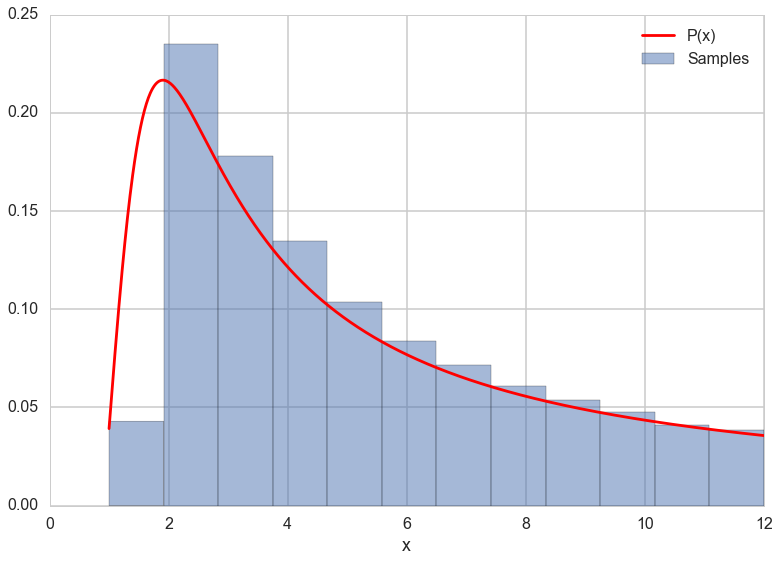

In [40]:
start = time.time()

N = 100000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(0, 1, N)
    

# apply the inverse CDF lookup table to get X
X = lookup_vec(R)

end = time.time() - start
print 'Time to run: %0.5f seconds' % end

# plot the histogram
plt.hist(X, bins=12, label=u'Samples', alpha=0.5, normed=True)

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, pmf(xvals)*norm_constant, 'r', label=u'P(x)')
plt.xlabel("x")
# turn on the legend
plt.legend()
plt.plot()

### Which is faster? 

Once the lookup table was built, it took 0.187 seconds to generate 100,000 samples. The rejection sampling method took about 0.7 seconds to generate 100,000 samples. The lookup table was faster. 

Lookup tables are fast because lookups can be done in O(1) time. However, in order to be able to reasonably store the data into a lookup table there needs to be a manageable number of discrete values for X, such as in this case. However, in a situation where X is continuous and not discrete, or where the support is much larger than 12 options, a lookup would not be a good option. Therefore, in situations where the X values are discrete and manageably finite, a lookup table would be faster. However, when that is not the case, an analytical solution to the anti-derivative would be preferable. 

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1$

$g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$

$f(x,y) = \max(g_1(x,y), 0) + \max(g_2(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

I start off by plotting a 3D visual of the target function f(x, y) and find that it is bimodal in 3D space. There is a larger bump centered at (-0.4, -0.4) that looks bivariate Normal and a smaller one centered at (0.4, 0.4) that also looks bivariate Normal. I use this knowledge later when I select a candidate function for the importance sampling and control variates methods. 

I also create a table to store the runtime and error outcomes of each of the techniques for plotting into a table later. 

In [41]:
# create the target function
def f(x, y): 
    g1 = lambda x, y: -(x + 0.4)**2 - (y + 0.4)**2 + 0.1
    g2 = lambda x, y: -(x - 0.4)**2 - (y - 0.4)**2 + 0.05

    return np.maximum(g1(x, y), 0) + np.maximum(g2(x, y), 0)

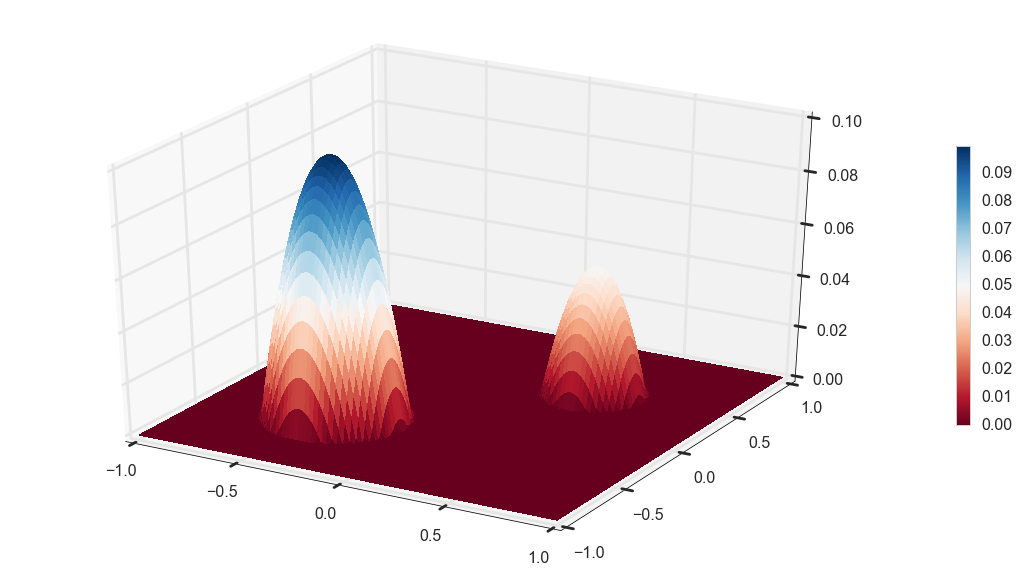

In [42]:
# plot the function

fig = plt.figure(figsize=(20,10))
# make ax 3D
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X,Y = np.meshgrid(x, y)
Z = f(X, Y)

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

In [43]:
# create dict to store (runtime, error) for each method (to print into table later)
table = {}

### Vanilla Monte Carlo Estimation

For the vanilla Monte Carlo method, I draw 10,000 samples per 1000 simulations randomly and uniformly between the bounds of the integral of -1 to 1 for each of x and y. I then evaluate the target function and average the value over the samples and the simulations to get the expected value. Since this is in 3 dimensions, I multiply the expected value by the area of the bound of x and y (which is 1-(-1) = 2 for each of x and y, for a total area of 4 units). The estimated value of the integral is between 0.0195-0.020 with an error of 0.0006, depending on the simulation run. 

In [44]:
N_samples = 10000
N_sims = 1000

xmin = -1
xmax = 1
ymin = -1
ymax = 1

In [45]:
def estimate_double_integral_MC(function_to_integrate, xmin, xmax, ymin, ymax, number_of_samples, number_of_tries):
    startTime = time.time()
    
    simulations = np.zeros(number_of_tries)
    number_of_samples = float(number_of_samples)
    
    for i in range(number_of_tries):
        # choose out of uniform[lower_bound, upper_bound]
        x = np.random.uniform(low=xmin, high=xmax, size=number_of_samples)  
        y = np.random.uniform(low=ymin, high=ymax, size=number_of_samples)  

        # apply function
        f = function_to_integrate(x, y)

        # get average
        average = f.sum()/number_of_samples

        # multiply result of above to (upper_bound-lower_bound) in two dimensions
        simulations[i] = average*(xmax - xmin)*(ymax - ymin)

    timeelapsed = time.time() - startTime
    
    table['VanillaMC'] = (timeelapsed, simulations.std(), simulations.mean())
    
    # return the mean of simulatoins and standard deviation
    return simulations, simulations.mean(), simulations.std()

In [46]:
simulations3, mean3, stddev3 = estimate_double_integral_MC(f, xmin, xmax, ymin, ymax, N_samples, N_sims)

/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [47]:
print 'The mean is', mean3
print 'The error is', stddev3
# should be 0.019

The mean is 0.0196419575382
The error is 0.000679651036582


[]

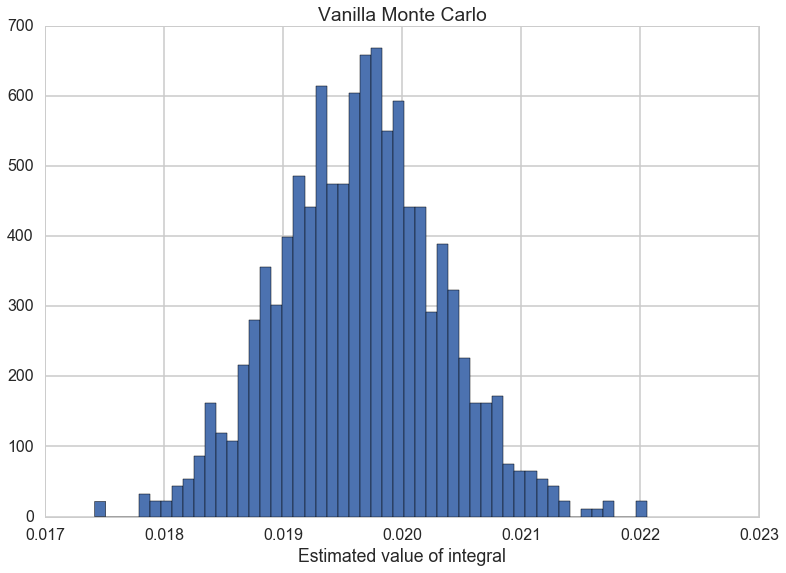

In [48]:
# out of curiosity, I plot the results of the simulation 
plt.hist(simulations3, bins=50,  normed=True)
plt.xlabel('Estimated value of integral')
plt.title('Vanilla Monte Carlo')
plt.plot()

### MC with Stratified Sampling

For the stratified sampling, I create 10 strata per dimension, for a total of 100 strata across the x-y space. I use a double for-loop to apply basic Monte Carlo to each strata and add up the results across the strata while moving row-wise and then column-wise across a checkerboard-like space. In each strata, I draw 10,000/100 samples so that the total number of samples still sums the same as the vanilla Monte Carlo of a total of 10,000 points. The estimated integral is also about 0.196 with a lower error than the vanilla Monte Carlo of abotu 0.0002. 

In [49]:
N_strata = 10 # per dimension. This creates 100 strata (10 x 10) across the x-y space

In [50]:
start = time.time()

xstep = (xmax-xmin)/float(N_strata)
Uxmin = xmin
Uxmax = xmin + xstep

ystep = (ymax-ymin)/float(N_strata)
Uymin = ymin
Uymax = ymin + ystep    

sims = np.zeros(N_sims)
N_samples = float(N_samples)

for i in range(N_sims):
    Il = 0
    for j in range(N_strata):
        for k in range(N_strata):
            # choose out of uniform[lower_bound, upper_bound]    
            x = np.random.uniform(low=Uxmin, high=Uxmax, size=1.0*N_samples/(N_strata**2))  
            y = np.random.uniform(low=Uymin, high=Uymax, size=1.0*N_samples/(N_strata**2))
            
            z = f(x, y)
            # apply function and multiply result of above to (upper_bound-lower_bound) in two dimensions
            Il += np.mean(z)*(Uxmax-Uxmin)*(Uymax-Uymin)

            Uxmin += xstep
            Uxmax += xstep

        Uymin += ystep
        Uymax += ystep
        # reset xmin and xmax to wrap back around the "checkerboard"
        Uxmin = xmin
        Uxmax = xmin + xstep

    # Reset for next simulation
    sims[i] = Il
    Uxmin = xmin
    Uxmax = xmin + xstep
    Uymin = ymin
    Uymax = ymin + ystep    

elapsed = time.time() - start
table['MC_stratified'] = (elapsed, sims.std(), sims.mean())    
    
print 'The mean is', sims.mean()
print 'The error is', sims.std()

The mean is 0.0196395936322
The error is 0.000270423593617


/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[]

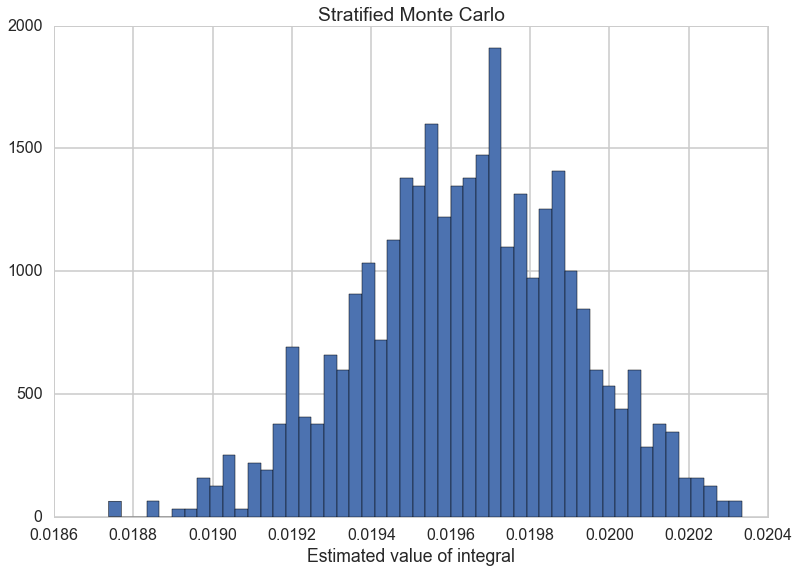

In [51]:
plt.hist(sims, bins=50, label = 'Stratified', normed=True)
plt.xlabel('Estimated value of integral')
plt.title('Stratified Monte Carlo')
plt.plot()

### MC with Importance Sampling

Given that I know from my visualization in the beginning of this problem that the f(x, y) distribution is bimodal, for my g(x, y), I use a combination of two bivariate Normal distributions, one for each mode centered at (-0.4, -0.4) and (0.4, 0.4) with a reasonable variance of 0.01 such that g(x, y) = 0.7\*g1(x, y) + 0.3\*g2(x, y), where g1 and g2 are each bivariate normal distributions. I chose the constants 0.7 and 0.3 such that they add up to 1 (though I still calculate a normalization constant just in case and use it, though it is very close to 1 because of the way g(x,y) is set up) and to match the fact that there is a larger mode centered at (-0.4, -0.4) in the target distribution. 

I then check that this is a reasonable function by plotting it in 3D to ensure it looks similar to the original function plotted in the beginning or problem 5. I also plot both f(x,y) and g(x, y) against each of the x and y axes in two dimensions to ensure that the condition that g(x, y) > 0 when f(x, y)p(x, y) != 0 is met in both of these dimensions. 

Using ```np.random.multivariate_normal(mean1, cov1, size=N)```, I generate 4/5 of my samples from the distribution centered at (-0.4, -0.4) and 1/5 from the other. 

In [60]:
# create the candidate function g(x, y) that is similar to f(x, y)
mean1 = [-0.4, -0.4]
cov1 = [[0.01, 0], [0, 0.01]]

rv1 = scipy.stats.multivariate_normal(mean1, cov1)

mean2 = [0.4, 0.4]
cov2 = [[0.01, 0], [0, 0.01]]

rv2 = scipy.stats.multivariate_normal(mean2, cov2)
    
def g(x, y):
    # combine two bivariate Gaussians
    result = 0.7*rv1.pdf((x, y)) + 0.3*rv2.pdf((x, y))
    return result

g_vec = np.vectorize(g)

In [61]:
# Rejection sampling to generate samples
def rejection_sampling(N, pdf_func):
    accepted = 0 # the number of accepted samples
    xsamples = np.zeros(N)
    ysamples = np.zeros(N)
    count = 0 # the total count of proposals
    
    while (accepted < N):
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=ymin, high=ymax)

        # pick a uniform number on [0, 1]
        z = np.random.uniform(low=0, high=1)

        # accept if z is less than pdf(x, y)
        if z < pdf_func((x, y)):
            xsamples[accepted] = x
            ysamples[accepted] = y
            accepted += 1

        count +=1
    
    return xsamples, ysamples

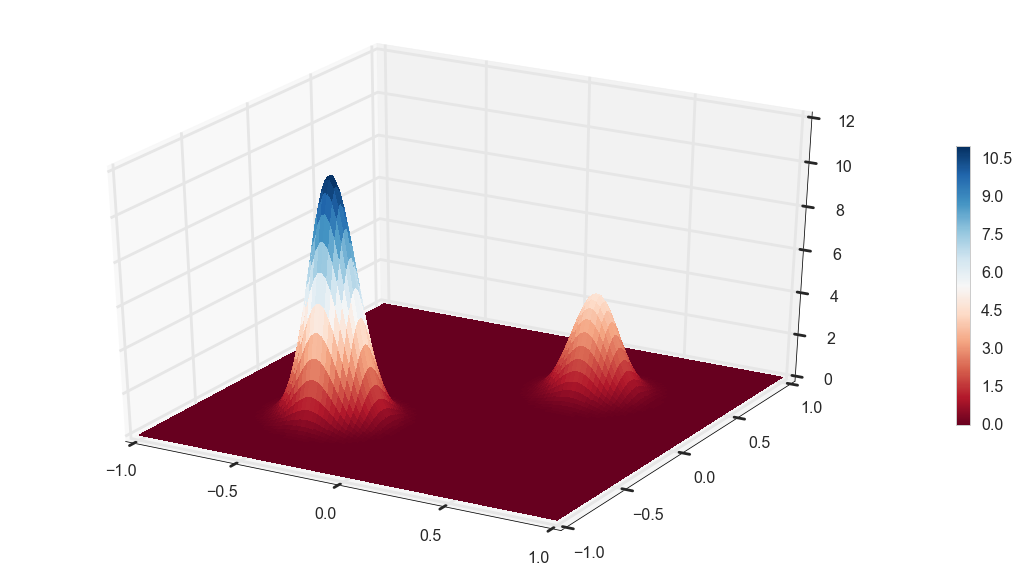

In [144]:
# plot the g(x, y) to confirm it is similar to f(x, y)
fig = plt.figure(figsize=(20,10))
# make ax 3D
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X,Y = np.meshgrid(x, y)
Z = g_vec(X, Y)

p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

Here is a view for the Y-axis perspective where I plot f(x, y) and g(x, y) for given values of and x and y. Again, this is to ensure that the condition for g(x, y) is met where g(x, y) > 0 when f(x, y)p(x, y) != 0 by checking each dimension, x and y one at a time. 

[]

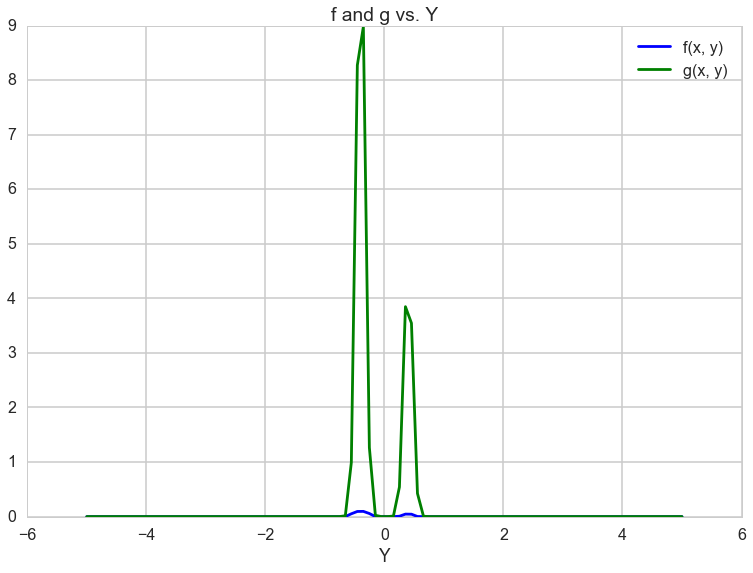

In [63]:
# plot both g(x, y) and f(x, y) distributions against X and Y axis, one at a time to confirm that f(x, y) > 0 when 
# f(x, y)p(x, y) != 0

# View from the Y-axis

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
target_func = f(x, y)
candidate_func = g_vec(x, y)

plt.plot(y, target_func, 'b', label='f(x, y)')
plt.plot(y, candidate_func, 'g', label='g(x, y)')
plt.title('f and g vs. Y')
plt.xlabel('Y')
plt.legend()
plt.plot()

Here is a view for the X-axis perspective below. Again you can see that wherever f(x,y) is not equal to zero, so is g(x, y). 

[]

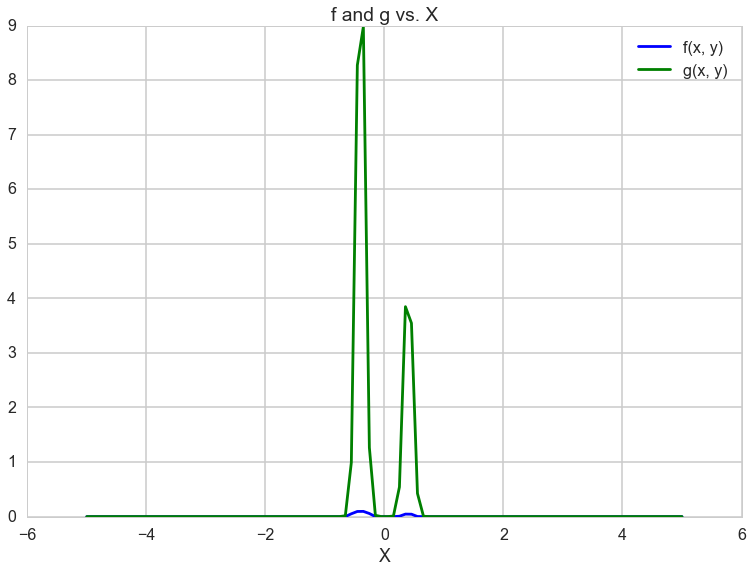

In [64]:
# View from the X-axis
plt.plot(x, target_func, 'b', label='f(x, y)')
plt.plot(x, candidate_func, 'g', label='g(x, y)')
plt.title('f and g vs. X')
plt.xlabel('X')
plt.legend()
plt.plot()

#### Get the Normalization Factor

Next, I need to get the normalization factor for my g(x, y). I do this by using the Mean Value Theory for Integrals to estimate the integral of my g(x, y) function over the requested integral bounds of x from -1 to 1 and y from -1 to 1. I do this for 1000 simulations and 1000 samples per simulation and use the mean of the simulations. I used the mean of my simulations and create the normalization factor by taking the reciprocal of the value, because that is the constant factor that makes the integral of my g(x, y) equal to 1.

Because of my selection of g(x, y), the normalization factor is already quite close to 1. 

In [157]:
# Get normalization factor. Estimate integral and get the normalization by 1/integral
    
N = 1000
norm_sims = np.zeros(N)
for i in range(N): 
    x = np.random.uniform(low=-1, high=1, size=N)
    y = np.random.uniform(low=-1, high=1, size=N)

    g_val = g_vec(x, y)
    
    estimated_integral = np.mean(g_val)*(xmax-xmin)*(ymax-ymin)
    
    norm_sims[i] = estimated_integral

print 'The mean of estimated integral is', norm_sims.mean()
print 'The standard deviation is', norm_sims.std()

The mean of estimated integral is 0.997813155047
The standard deviation is 0.131483985721


In [158]:
norm_factor = 1/norm_sims.mean()
norm_factor

1.0021916377253295

#### Do the importance sampling

Back to importance sampling, I then evaluate f(x, y)/(g(x, y)*normalization factor) using the generated samples from the respective distributions to get an estimate of the integral. In this case the normalization factor is close to 1 but I use it anyway. I get a mean of all the simulations of about 0.020 and a error of 0.00016. 

In [140]:
start = time.time()

sims = np.zeros(N_sims)
for i in range(N_sims):
    # generate samples
    # draw more samples from the mode at mean (-0.4, -0.4)
    xsample1, ysample1 = np.random.multivariate_normal(mean1, cov1, size=int(N_samples*4/5)).T
    xsample2, ysample2 = np.random.multivariate_normal(mean2, cov2, size=int(N_samples*1/5)).T

    # combine the samples and create an a column
    xs = np.concatenate((xsample1, xsample2), axis=0)
    ys = np.concatenate((ysample1, ysample2), axis=0)

    # evaluate and store the simulation
    sims[i] = np.mean(f(xs, ys)/(g_vec(xs, ys)*norm_factor))
    
elapsed = time.time() - start
table['MC_importance'] = (elapsed, sims.std(), sims.mean())    
    
print 'The mean is', sims.mean()
print 'The standard deviation is', sims.std()

The mean is 0.0206454616707
The standard deviation is 0.000160473220484


### MC with Control Variates

Using the same function as in the Importance Sampling, I first check that the correlation between the two functions is high enough. The correlation is about 0.93. 

To estimate Tau, which is the expected value of g(x, y), I then use vanilla MC over 1000 simulations and 1000 samples per simulation. 

Finally, I draw X and Y uniformly over the bounds of the integral of -1 to 1 and compute the optimal value of b. Again, consistent with previous methods I use 10,000 samples over 1,000 simulations in order to have an apples-to-apples comparison when comparing the runtime of the different variance reduction methods. 

In [68]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
target_func = f(x, y)
candidate_func = g_vec(x, y)

# check correlation is high
scipy.stats.stats.pearsonr(target_func, candidate_func)

(0.93324905616688392, 2.2966567245936635e-45)

In [69]:
tau_sims = np.zeros(1000)

for i in range(1000):
    x = np.random.uniform(low=-1, high=1, size=1000)
    y = np.random.uniform(low=-1, high=1, size=1000)

    g_val = g_vec(x, y)
    tau_est = np.mean(g_val)
    
    tau_sims[i] = tau_est

print "The mean of tau across simulations is", tau_sims.mean()
print "The std deviation of tau across simulations is", tau_sims.std()

# assign meant to tau to use in control variates formula below
tau = tau_sims.mean()

The mean of tau across simulations is 0.248309960707
The std deviation of tau across simulations is 0.0327836158795


In [160]:
start = time.time()

sims = np.zeros(N_sims)
for i in range(N_sims):    
    X = np.random.uniform(low=-1, high=1, size=N_samples)
    Y = np.random.uniform(low=-1, high=1, size=N_samples)

    # compute optimal value for b
    q = np.cov(g_vec(X, Y),f(X, Y));  
    b = - q[0,1]/np.var(g_vec(X, Y));  

    # compute our estimate
    sims[i] = (xmax-xmin)*(ymax-ymin)*(np.mean(f(X, Y)) + b *(np.mean(g_vec(X, Y)) - tau))

elapsed = time.time() - start
table['MC_control_variates'] = (elapsed, sims.std(), sims.mean())    

print 'The mean is', sims.mean()
print 'The standard deviation is', sims.std()

The mean is 0.0195334242961
The standard deviation is 0.000313788390486


/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### MC with Antithetic Variates

Antithetic variates is useful when the function we are trying to estimate is monotonic, which is not the case here. However, they could be beneficial in combination with stratification in order to divide out the function into strata where within each strata, the function is monotonically increasing or decreasing. 

### Table of Runtime and Error

In [161]:
df = pd.DataFrame(table).T
# add column names
df = df.rename(columns={0: 'Runtime (seconds)', 1: 'Standard Deviation', 2: 'Mean Estimate'})

df


,Runtime (seconds),Standard Deviation,Mean Estimate
MC_control_variates,924.090019,0.000314,0.019533
MC_importance,318.999292,0.000160,0.020645
MC_stratified,3.849230,0.000270,0.019640
VanillaMC,0.406001,0.000680,0.019642


Based on the table above, we see that stratification, importance sampling, and control variates do indeed decrease the variance of the function when compared to vanilla/basic Monte Carlo. The error is lowest using stratified and importance sampling. 

In terms of runtime, control variates and importance sampling are the most time consuming by far. Note that for all cases, I used 10,000 samples per 1000 simulations. Also note that in the control variates example, I did not include the time it took to generate an estimate for tau. And similarly, for the importance sampling, I did not include the time to generate an estimate for the normalization constant. Vanilla MC is by far the fastest needing less than half a second, followed by stratified sampling requiring almost 4 seconds. 